# UB DataScience: Complex networks
### David Solans

In [1]:
# source: http://opendata-ajuntament.barcelona.cat/
import networkx as nx
import matplotlib.pyplot as plt
from multiprocessing import Pool
import itertools
from networkx.algorithms import community
import collections
import pandas as pd
import re
import pickle

%matplotlib inline

In [2]:
from os import listdir
from os.path import isfile, join

metro_lines_folder = "Lineas_metro/"
onlyfiles = [f for f in listdir(metro_lines_folder) if isfile(join(metro_lines_folder, f))]
onlyfiles = sorted(onlyfiles, key=lambda t: (int(("").join(re.findall(r'\d+',t)))))
print("Files list: ", onlyfiles)

metro_stations = []
metro_lines = []
for f in onlyfiles:
    with open(metro_lines_folder+f, "r", encoding='utf-8') as ins:
        line_stations = [] 
        for station in ins:
            station = station.replace("\n", "")
            if station.endswith("\n."):
                station = station[0:-1]
            metro_stations.append(station)
            line_stations.append(station)
        metro_lines.append(line_stations)

unique_metro_stations = list(set(metro_stations))

Files list:  ['L1.txt', 'L2.txt', 'L3.txt', 'L4.txt', 'L5.txt', 'L6.txt', 'L7.txt', 'L8.txt', 'L9N.txt', 'L9S.txt', 'L10.txt', 'L11.txt']


In [3]:
G = nx.Graph()   # or DiGraph, MultiGraph, MultiDiGraph, etc
s1 = 0
s2 = 0

In [4]:
for l in metro_lines:
    for i in range(1,len(l)):
        s1 = unique_metro_stations.index(l[i-1])
        s2 = unique_metro_stations.index(l[i])
        G.add_edge(s1, s2)# explicit two-node form

In [5]:
G.nodes()

NodeView((24, 86, 25, 69, 29, 148, 43, 91, 20, 49, 23, 72, 132, 111, 104, 106, 0, 131, 57, 22, 81, 1, 83, 46, 59, 110, 67, 33, 76, 9, 105, 75, 12, 98, 139, 145, 66, 38, 107, 48, 34, 151, 79, 44, 80, 133, 134, 95, 8, 144, 45, 5, 143, 142, 40, 122, 96, 140, 119, 52, 2, 19, 129, 109, 28, 11, 101, 92, 113, 146, 51, 36, 30, 126, 4, 108, 93, 70, 78, 99, 141, 94, 128, 13, 54, 100, 32, 26, 102, 121, 130, 88, 135, 118, 138, 61, 63, 149, 39, 116, 65, 6, 14, 90, 21, 31, 85, 127, 27, 3, 150, 55, 41, 60, 16, 124, 47, 137, 15, 68, 114, 136, 18, 10, 42, 87, 120, 71, 97, 17, 58, 112, 123, 73, 53, 62, 56, 35, 84, 74, 82, 7, 37, 117, 103, 64, 89, 125, 50, 77, 115, 147))

In [6]:
def plotNetwork(G, node_categories, colormap="jet", pos=None):
    plt.axis("off")
    if pos == None:
        pos = spring_pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos = pos, cmap = plt.get_cmap(colormap), node_color = node_categories, node_size = 35, with_labels = False)

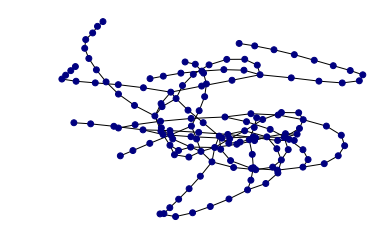

In [7]:
plotNetwork(G, [0]*len(G.nodes()))

In [8]:
import requests

bus_stations = []
bus_lines = []
for l in requests.get("http://barcelonaapi.marcpous.com/bus/lines.json").json()["data"]["tmbs"]:
    line = l["line"]
    print("line: ", line)
    bus_line = []
    line_request = requests.get("http://barcelonaapi.marcpous.com/bus/line/id/"+line+".json")
    if line_request.status_code == 200:
        for s in line_request.json()["data"]["tmb"]:
        
            bus_line.append(s["id"])
            bus_stations.append(s["id"])
        bus_lines.append(bus_line)

line:  D20
line:  H6
line:  H12
line:  V7
line:  V21
line:  6
line:  7
line:  9
line:  11
line:  13
line:  15
line:  16
line:  17
line:  19
line:  20
line:  21
line:  22
line:  23
line:  24
line:  26
line:  27
line:  28
line:  32
line:  33
line:  34
line:  36
line:  37
line:  39
line:  40
line:  41
line:  42
line:  43
line:  44
line:  45
line:  46
line:  47
line:  50
line:  51
line:  54
line:  55
line:  57
line:  58
line:  59
line:  60
line:  62
line:  63
line:  64
line:  65
line:  66
line:  67
line:  68
line:  70
line:  71
line:  72
line:  73
line:  75
line:  76
line:  78
line:  79
line:  91
line:  92
line:  94
line:  95
line:  96
line:  97
line:  102
line:  103
line:  104
line:  107
line:  109
line:  110
line:  111
line:  112
line:  113
line:  114
line:  115
line:  116
line:  117
line:  118
line:  119
line:  120
line:  121
line:  122
line:  123
line:  124
line:  125
line:  126
line:  127
line:  128
line:  129
line:  130
line:  131
line:  132
line:  141
line:  150
line:  155
line:  15

In [9]:
bus_stations[:2]

['1788', '274']

In [10]:
bus_station_id_to_name2 = {}
all_stations_request = requests.get("http://barcelonaapi.marcpous.com/bus/stations.json")
for s in all_stations_request.json()["data"]["tmbs"]:
    bus_station_id_to_name2[int(s['id'])] = s


In [11]:
bus_station_id_to_name2

{1: {'buses': '06 - 40 - 42 - 141 - B25 - N11',
  'city': 'BARCELONA',
  'furniture': 'Pal',
  'id': '1',
  'lat': '41.3985182',
  'lon': '2.1917991',
  'street_name': 'Almogàvers-Àvila',
  'utm_x': '432542,5460',
  'utm_y': '4583524,2340'},
 2: {'buses': '14 - 41 - 92',
  'city': 'BARCELONA',
  'furniture': 'Pal',
  'id': '2',
  'lat': '41.3931462',
  'lon': '2.1990183',
  'street_name': 'Av Icària-Bogatell',
  'utm_x': '433118,9100',
  'utm_y': '4582908,7000'},
 3: {'buses': '20 - 43 - 44 - 63 - N7',
  'city': 'BARCELONA',
  'furniture': 'Marquesina',
  'id': '3',
  'lat': '41.3885874',
  'lon': '2.1579250',
  'street_name': 'València-Muntaner',
  'utm_x': '429684,6715',
  'utm_y': '4582430,1371'},
 4: {'buses': '20 - 43 - 44',
  'city': 'BARCELONA',
  'furniture': 'Marquesina',
  'id': '4',
  'lat': '41.3904986',
  'lon': '2.1580012',
  'street_name': 'Mallorca-Aribau',
  'utm_x': '429695,7860',
  'utm_y': '4582655,2320'},
 5: {'buses': '54',
  'city': 'BARCELONA',
  'furniture': 'P

In [12]:
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [13]:
save_obj(bus_station_id_to_name2, "bus_stations_properties")

In [14]:
bus_station_id_to_name2[777]

{'buses': '30 - 32 - 43 - 44 - 78 - 115',
 'city': 'BARCELONA',
 'furniture': 'Pal',
 'id': '777',
 'lat': '41.3805139',
 'lon': '2.1436483',
 'street_name': 'Av de Roma-Tarragona',
 'utm_x': '428486,2180',
 'utm_y': '4581552,6000'}

In [15]:
print(bus_stations)
unique_bus_stations = list(set(bus_stations))

['1788', '274', '1284', '1282', '1604', '954', '955', '1164', '255', '256', '257', '2617', '1326', '1004', '140', '209', '377', '1185', '180', '181', '1365', '1364', '1767', '1768', '1756', '856', '1373', '1713', '2982', '3286', '1788', '273', '1283', '1606', '1605', '956', '1476', '254', '253', '252', '2618', '723', '722', '1061', '770', '1620', '1367', '788', '392', '391', '179', '584', '708', '707', '1766', '1755', '1239', '778', '2984', '3286', '556', '3233', '3222', '3234', '3223', '481', '516', '940', '1938', '1939', '934', '96', '1742', '1581', '1120', '1512', '505', '3226', '3227', '495', '626', '1412', '1887', '1907', '875', '1886', '556', '21', '458', '3232', '239', '487', '1941', '1940', '529', '994', '933', '99', '1582', '1513', '2777', '3229', '3228', '459', '437', '823', '820', '1095', '1958', '1591', '1590', '1886', '3225', '91', '2968', '472', '2970', '185', '2363', '1173', '868', '941', '1310', '389', '3247', '1254', '1556', '1469', '927', '1075', '1209', '1070', '149'

In [16]:
G2 = nx.Graph()   # or DiGraph, MultiGraph, MultiDiGraph, etc
s1 = 0
s2 = 0

for l in bus_lines:
    for i in range(1,len(l)):
        s1 = int(l[i-1])
        s2 = int(l[i])
        G2.add_edge(s1, s2)# explicit two-node form

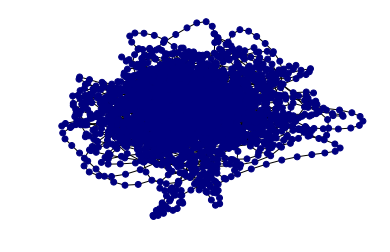

In [17]:
plotNetwork(G2, [0]*len(G2.nodes()))

In [18]:
len(unique_bus_stations)

2469

In [19]:
print(nx.info(G2))

Name: 
Type: Graph
Number of nodes: 2469
Number of edges: 3127
Average degree:   2.5330


In [20]:
F = nx.compose(G,G2)

In [21]:
print(nx.info(F))

Name: 
Type: Graph
Number of nodes: 2496
Number of edges: 3295
Average degree:   2.6402


In [22]:
nx.write_edgelist(F, "barcelona_transport.edgelist")
nx.write_edgelist(G, "barcelona_metro.edgelist")
nx.write_edgelist(G2, "barcelona_bus.edgelist")

In [23]:
#nx.write_edgelist(nx.path_graph(4), "test.edgelist")
G3=nx.read_edgelist("barcelona_transport.edgelist")

In [24]:
print(nx.info(G3))

Name: 
Type: Graph
Number of nodes: 2496
Number of edges: 3295
Average degree:   2.6402
